# Make prediction about coal prediction

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set();

In [8]:
df = pd.read_csv('../data/cleaned_coalpublic2013.csv',header=0,index_col='MSHA ID')
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours,log_production
MSHA ID,,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,10.933178
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,10.268374
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,14.180234
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,11.380388
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,11.901577


In [9]:
df.shape

(1061, 16)

In [11]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


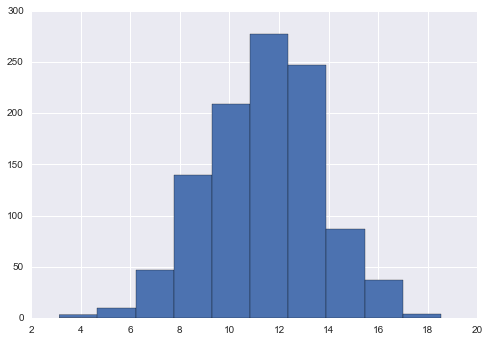

In [67]:
df.log_production.hist()

In [10]:
df['Mine_Status'].unique()

array(['Active, men working, not producing', 'Permanently abandoned',
       'Active', 'Temporarily closed', 'New, under construction'], dtype=object)

In [15]:
df[['Mine_Status','log_production']].groupby('Mine_Status').mean()

,log_production
Mine_Status,
Active,11.977453
"Active, men working, not producing",10.499962
"New, under construction",3.951244
Permanently abandoned,9.896046
Temporarily closed,9.162933


# Predict the Production of coal mines

In [18]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


In [19]:
df.Year.unique()

array([2013])

In [17]:
df.Union_Code.unique()

array([' ', 'UNIT', 'United Mine Workers of America', 'INTE',
       'International Union of Operation Engineers',
       'Scotia Employees Association', 'Western Energy Workers'], dtype=object)

In [44]:
features = ['Average_Employees',
            'Labor_Hours',
          ]

categoricals = ['Mine_State',
                'Mine_County',
                'Mine_Status',
                'Mine_Type',
                'Company_Type',
                'Operation_Type',
                'Union_Code',
                'Coal_Supply_Region',
          ]

target = 'log_production'

## first, look at the interplay between each possible predictor and the target variable

In [45]:
df.columns

Index(['Year', 'Mine_Name', 'Mine_State', 'Mine_County', 'Mine_Status',
       'Mine_Type', 'Company_Type', 'Operation_Type', 'Operating_Company',
       'Operating_Company_Address',
       ...
       'Union_Code_United Mine Workers of America',
       'Union_Code_Western Energy Workers',
       'Coal_Supply_Region_Appalachia Central',
       'Coal_Supply_Region_Appalachia Northern',
       'Coal_Supply_Region_Appalachia Southern',
       'Coal_Supply_Region_Illinois Basin', 'Coal_Supply_Region_Interior',
       'Coal_Supply_Region_Powder River Basin',
       'Coal_Supply_Region_Uinta Region', 'Coal_Supply_Region_Western'],
      dtype='object', length=989)

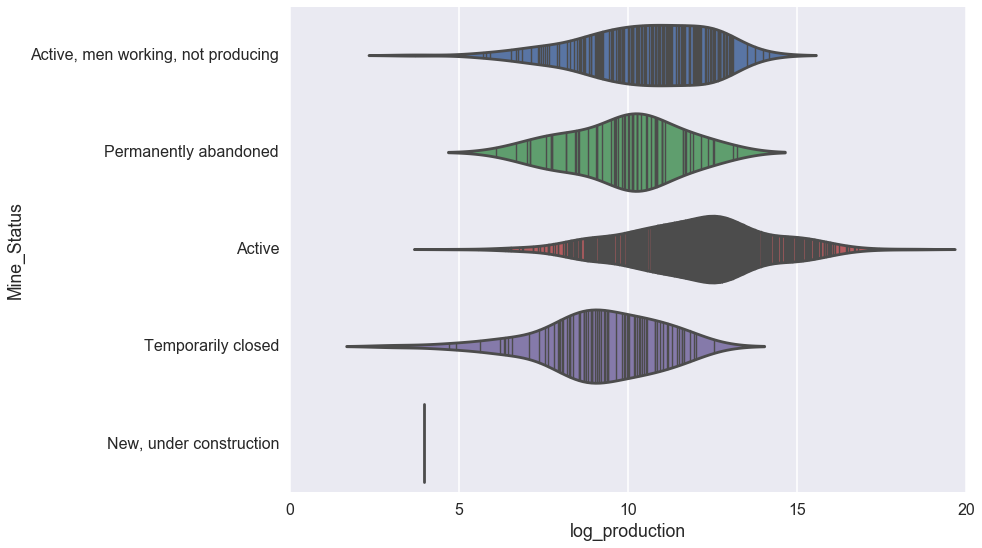

In [46]:
fig = plt.subplots(figsize = (14,8))
sns.set_context('poster')
sns.violinplot(y='Mine_Status',x='log_production', data=df,
              split=True, inner = 'stick',)
plt.tight_layout()

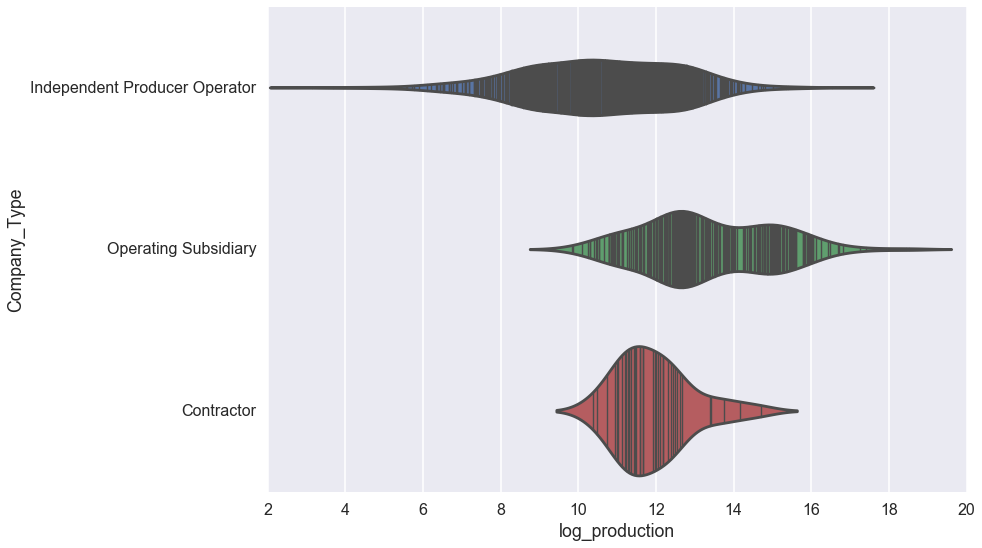

In [47]:
fig = plt.subplots(figsize = (14,8))
sns.set_context('poster')
sns.violinplot(y='Company_Type',x='log_production', data=df,
              split=True, inner = 'stick',)
plt.tight_layout()

In [48]:
df.Company_Type.unique()

array(['Independent Producer Operator', 'Operating Subsidiary',
       'Contractor'], dtype=object)

## create dummies
+ the function creates 3 new colunmns for each category

In [49]:
pd.get_dummies(df['Company_Type']).sample(50).head()

,Contractor,Independent Producer Operator,Operating Subsidiary
MSHA ID,,,
1517941,0.0,0.0,1.0
1512753,0.0,0.0,1.0
1519318,0.0,0.0,1.0
3602733,0.0,1.0,0.0
4103428,0.0,0.0,1.0


In [50]:
# turn eqch categorical variable into a dummy variable

dummy_categoricals = []
for categorical in categoricals:
    print(categorical,len(df[categorical].unique())) 
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical],prefix=categorical)
    df = pd.concat([df,temp_df],axis = 1)
    temp_df.drop('_'.join([categorical, str(drop_var)]), axis = 1, inplace = True)
    dummy_categoricals +=temp_df.columns.tolist()

Mine_State 29
Mine_County 164
Mine_Status 5
Mine_Type 3
Company_Type 3
Operation_Type 2
Union_Code 7
Coal_Supply_Region 8


In [52]:
dummy_categoricals[:10]

['Mine_State_Alabama',
 'Mine_State_Alaska',
 'Mine_State_Arizona',
 'Mine_State_Arkansas',
 'Mine_State_Colorado',
 'Mine_State_Illinois',
 'Mine_State_Indiana',
 'Mine_State_Kansas',
 'Mine_State_Kentucky (East)',
 'Mine_State_Kentucky (West)']

# Build our model

In [53]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [54]:
len(dummy_categoricals)

213

In [57]:
df.shape

(1061, 1210)

In [60]:
test.shape

(319, 1210)

In [55]:
train, test = train_test_split(df, test_size = 0.3)

In [63]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)

In [64]:
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

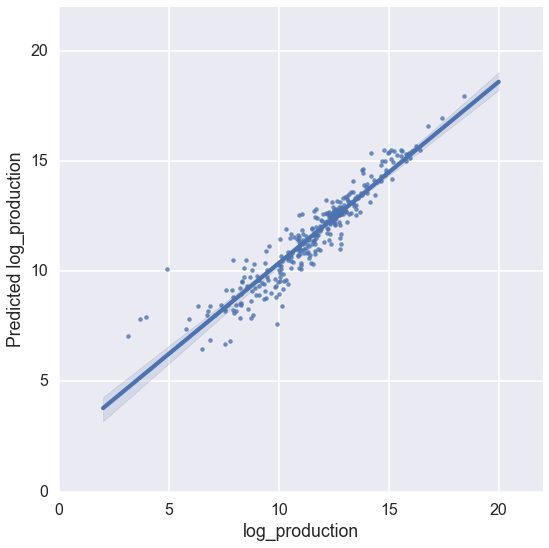

In [67]:
fig = plt.subplots(figsize = (8,8))
sns.regplot(test[target],rf.predict(test[features + dummy_categoricals]))
plt.ylabel('Predicted log_production')
plt.xlim(0, 22)
plt.ylim(0, 22)
plt.tight_layout()


In [68]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [70]:
predicted = rf.predict(test[features + dummy_categoricals])
r2_score(test[target], predicted)

0.87932195036446992

In [71]:
explained_variance_score(test[target], predicted)

0.88083361311273922

In [72]:
mean_squared_error(test[target], predicted)

0.6987063758707428

In [76]:
# find out the relative importance of each feature

rf_importances = pd.DataFrame({'name':train[features + dummy_categoricals].columns,
                              'importance':rf.feature_importances_
                              }).sort_values(by='importance', 
                                             ascending = False).reset_index(drop=True)
rf_importances[:20]

,importance,name
0,0.863181,Labor_Hours
1,0.030674,Average_Employees
2,0.007066,Coal_Supply_Region_Powder River Basin
3,0.005829,Coal_Supply_Region_Powder River Basin
4,0.003798,Mine_Type_Surface
5,0.003375,Mine_Type_Surface
6,0.001956,Mine_County_Boone
7,0.001802,Mine_State_West Virginia (Southern)
8,0.001784,Mine_State_West Virginia (Southern)
9,0.001746,Mine_Status_Active
